In [10]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18')
from colossus.halo import concentration, mass_defs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
sz_ft = 20
sz_lb = 14
color_arr = ['indigo', 'royalblue', 'lightseagreen', 'darkgreen', 'goldenrod', 'darkred']
from tqdm import tqdm
import cosmo
import lensing_estimator
from cosmo import CosmoCalc
import lensing
import foregrounds as fg
import experiments as exp
import sims
import stats
import tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Estimator Validation

In [23]:
nber_clus = 1000
nber_rand = 10000
nber_cov = 100
map_params = [240, 0.25, 240, 0.25]
l, cl = CosmoCalc().cmb_power_spectrum()
cluster_2e14 = [2e14, cosmo.concentration_parameter(2e14, 0.7, 0.674), 0.7]
cluster_6e14 = [6e14, cosmo.concentration_parameter(6e14, 0.7, 0.674), 0.7]
cluster_10e14 = [10e14, cosmo.concentration_parameter(10e14, 0.7, 0.674), 0.7]
cluster_arr = [cluster_2e14, cluster_6e14, cluster_10e14]
l, bl = exp.beam_power_spectrum(beam_fwhm = 1.0)
l, nl = exp.white_noise_power_spectrum(noiseval_white = 1.0)
l, nl_deconvolved =  exp.white_noise_power_spectrum(noiseval_white = 1.0, beam_fwhm = 1.0)
cl_noise =  nl_deconvolved
nber_clus_fit = 10000
nber_rand_fit = 10000
mass_int_estimator_validation = np.array([0])
mass_int_estimator_validation = np.append(mass_int_estimator_validation, np.arange(5, 7, 0.2))
#mass_int_estimator_validation = np.arange(5, 7, 0.2)
z = 0.7

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


In [12]:
maps_rand = sims.cmb_mock_data(map_params, l, cl,  bl = bl, nl = nl, nber_obs = nber_rand)
stack_bg_estimator_validation = lensing_estimator.stack(map_params, maps_rand, l = l, cl = cl, cl_noise = cl_noise)
del maps_rand
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_estimator_validation.npy', stack_bg_estimator_validation)   

In [24]:
covariance_matrix_estimator_validation, correlation_matrix_estimator_validation = lensing_estimator.covariance_and_correlation_matrix(nber_cov, nber_clus, map_params, l, cl, bl = bl, nl = nl, cl_noise = cl_noise)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_estimator_validation.npy', covariance_matrix_estimator_validation)  

100%|██████████| 100/100 [1:00:24<00:00, 36.24s/it]


In [15]:
model_profiles_estimator_validation = lensing_estimator.model_profiles(nber_clus_fit, nber_rand_fit, map_params, l, cl, mass_int_estimator_validation, z, bl = bl, cl_noise = cl_noise)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_estimator_validation.npy', model_profiles_estimator_validation)    

100%|██████████| 11/11 [00:10<00:00,  1.01it/s]


In [26]:
stack_bg_estimator_validation = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_estimator_validation.npy')   
covariance_matrix_estimator_validation = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_estimator_validation.npy')  
model_profiles_estimator_validation = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_estimator_validation.npy')    

lk_arr_2e14 = []      
lk_arr_6e14 = []  
lk_arr_10e14 = []  
for i in tqdm(range(5)):  
    maps_clus = sims.cmb_test_data(map_params, l, cl, cluster = cluster_arr, bl = bl, nl = nl, nber_obs = nber_clus, estimator_validation = True)
    maps_clus_2e14, maps_clus_6e14, maps_clus_10e14 = maps_clus[0], maps_clus[1], maps_clus[2]
    stack_clus_2e14 = lensing_estimator.stack(map_params, maps_clus_2e14, l = l, cl = cl, cl_noise = cl_noise)
    stack_clus_6e14 = lensing_estimator.stack(map_params, maps_clus_6e14, l = l, cl = cl, cl_noise = cl_noise)
    stack_clus_10e14 = lensing_estimator.stack(map_params, maps_clus_10e14, l = l, cl = cl, cl_noise = cl_noise)
    bins_2e14, lensing_dipole_profile_2e14, stack_dipole_2e14 = lensing_estimator.lensing_dipole(map_params, stack_clus_2e14, stack_bg_estimator_validation)
    bins_6e14, lensing_dipole_profile_6e14, stack_dipole_6e14 = lensing_estimator.lensing_dipole(map_params, stack_clus_6e14, stack_bg_estimator_validation)
    bins_10e14, lensing_dipole_profile_10e14, stack_dipole_10e14 = lensing_estimator.lensing_dipole(map_params, stack_clus_10e14, stack_bg_estimator_validation)
    data_2e14 = bins_2e14, lensing_dipole_profile_2e14, covariance_matrix_estimator_validation
    data_6e14 = bins_6e14, lensing_dipole_profile_6e14, covariance_matrix_estimator_validation
    data_10e14 = bins_10e14, lensing_dipole_profile_10e14, covariance_matrix_estimator_validation
   

    likelihood_2e14, _, _ = stats.run_ml(data_2e14, model_profiles_estimator_validation, mass_int_estimator_validation)
    mass_int_lk_2e14, lk_2e14 = likelihood_2e14
    likelihood_6e14, _, _ = stats.run_ml(data_6e14, model_profiles_estimator_validation, mass_int_estimator_validation)
    mass_int_lk_6e14, lk_6e14 = likelihood_6e14
    likelihood_10e14, _, _ = stats.run_ml(data_10e14, model_profiles_estimator_validation, mass_int_estimator_validation)
    mass_int_lk_10e14, lk_10e14 = likelihood_10e14
    lk_arr_2e14.append(lk_2e14)
    lk_arr_6e14.append(lk_6e14)
    lk_arr_10e14.append(lk_10e14)

del maps_clus
del maps_clus_2e14
del maps_clus_6e14
del maps_clus_10e14


lk_arr_estimator_validation = [lk_arr_2e14, lk_arr_6e14, lk_arr_10e14]
for i, mass in enumerate([2, 6, 10]):
    np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/lk_arr_estimator_validation_'+str(mass)+'e14.npy', lk_arr_estimator_validation[i]) 
    
comb_lk_2e14, mass_value_comb_lk_2e14, error_comb_lk_2e14 = stats.combined_likelihood(mass_int_lk_2e14, lk_arr_2e14)      
comb_lk_6e14, mass_value_comb_lk_6e14, error_comb_lk_6e14 = stats.combined_likelihood(mass_int_lk_6e14, lk_arr_6e14)      
comb_lk_10e14, mass_value_comb_lk_10e14, error_comb_lk_10e14 = stats.combined_likelihood(mass_int_lk_10e14, lk_arr_10e14)      
comb_lk_arr_estimator_validation = [comb_lk_2e14, comb_lk_6e14, comb_lk_10e14]
for i, mass in enumerate([2, 6, 10]):
    np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/comb_lk_arr_estimator_validation_'+str(mass)+'e14.npy', comb_lk_arr_estimator_validation[i]) 
mass_results_estimator_validation = "{0:11.3f}{1:>1}{2:5.3f}".format(mass_value_comb_lk_2e14, "+-", error_comb_lk_2e14) + "\n"
mass_results_estimator_validation += "{0:11.3f}{1:>1}{2:5.3f}".format(mass_value_comb_lk_6e14, "+-", error_comb_lk_6e14) + "\n"          
mass_results_estimator_validation += "{0:11.3f}{1:>1}{2:5.3f}".format(mass_value_comb_lk_10e14, "+-", error_comb_lk_10e14) + "\n"
file = open('/Volumes/Extreme_SSD/codes/master_thesis/code/results/mass_results_estimator_validation.txt',"w")
file.write(mass_results_estimator_validation)
file.close() 

  0%|          | 0/5 [00:00<?, ?it/s]/Volumes/Extreme_SSD/anaconda/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
100%|██████████| 5/5 [21:36<00:00, 259.30s/it]


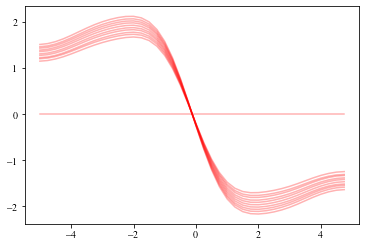

In [27]:
#plt.errorbar(bins_6e14, lensing_dipole_profile_6e14, yerr = np.sqrt(np.diagonal(covariance_matrix_estimator_validation)))

for i in range(len(model_profiles_estimator_validation)):
    plt.plot(bins_6e14, model_profiles_estimator_validation[i], alpha = 0.3, color = 'red')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

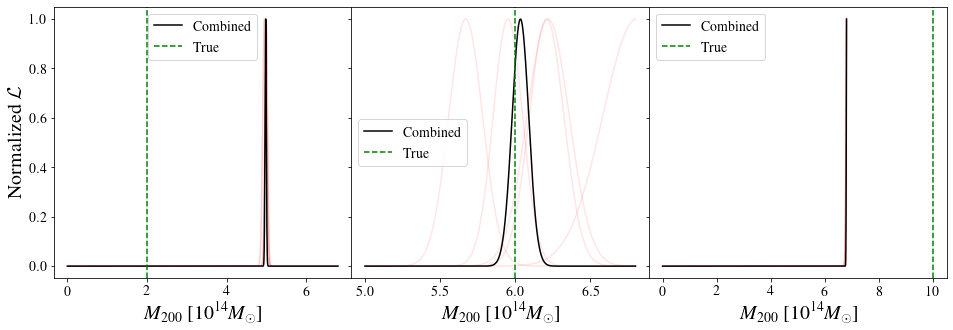

In [28]:
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(16,5))
(ax1, ax2, ax3) = axs
for i in range(5):
    ax1.plot(mass_int_lk_2e14, lk_arr_2e14[i], color = 'red', ls='-', alpha = 0.1)
ax1.plot(mass_int_lk_2e14, comb_lk_2e14, color = 'black', ls = '-', label = 'Combined')
ax1.tick_params(labelsize = sz_lb)
ax1.axvline(2, color = 'green', ls = '--', label = 'True') 
ax1.set_xlabel(r'$M_{200}\ [10^{14}M_\odot]$', fontsize = sz_ft)   
ax1.set_ylabel('Normalized '+r'$\mathcal{L}$', fontsize = sz_ft)
ax1.legend(prop={'size': sz_lb}) 
for i in range(5):
    ax2.plot(mass_int_lk_6e14[5000:], lk_arr_6e14[i][5000:], color = 'red', ls='-', alpha = 0.1)
ax2.plot(mass_int_lk_6e14[5000:], comb_lk_6e14[5000:], color = 'black', ls = '-', label = 'Combined')
ax2.tick_params(labelsize = sz_lb)
ax2.axvline(6, color = 'green', ls = '--', label = 'True') 
ax2.set_xlabel(r'$M_{200}\ [10^{14}M_\odot]$', fontsize = sz_ft) 
ax2.legend(prop={'size': sz_lb}) 
for i in range(5):
    ax3.plot(mass_int_lk_10e14, lk_arr_10e14[i], color = 'red', ls='-', alpha = 0.1)
ax3.plot(mass_int_lk_10e14, comb_lk_10e14, color = 'black', ls = '-', label = 'Combined')
ax3.tick_params(labelsize = sz_lb)
ax3.axvline(10, color = 'green', ls = '--', label = 'True') 
ax3.set_xlabel(r'$M_{200}\ [10^{14}M_\odot]$', fontsize = sz_ft) 
ax3.legend(prop={'size': sz_lb}) 

plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/estimator_validation.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

## Estimator Comparison 

In [51]:
nber_clus = 1000
nber_rand = 10000
nber_cov = 100
map_params = [240, 0.25, 240, 0.25]
l, cl = CosmoCalc().cmb_power_spectrum()
cluster = [2e14, cosmo.concentration_parameter(2e14, 0.7, 0.674), 0.7]
l, bl = exp.beam_power_spectrum(beam_fwhm = 1.0)
nl_arr = []
cl_noise_arr = []
noiseval_arr = [0.1, 0.5, 1, 3]
for noiseval in noiseval_arr:
    l, nl = exp.white_noise_power_spectrum(noiseval_white = noiseval)
    l, nl_deconvolved =exp.white_noise_power_spectrum(noiseval_white = noiseval, beam_fwhm = 1.0)
    nl_arr.append(nl)
    cl_noise_arr.append(nl_deconvolved)
nber_clus_fit = 10000
nber_rand_fit = 10000
mass_int_estimator_comparison = np.arange(0, 4, 0.2)
z = 0.7

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


In [52]:
stack_bg_estimator_comparison_arr = []
for i in range(len(nl_arr)): 
    maps_rand = sims.cmb_mock_data(map_params, l, cl,  bl = bl, nl = nl_arr[i], nber_obs = nber_rand)
    stack_bg = lensing_estimator.stack(map_params, maps_rand, l = l, cl = cl, cl_noise = cl_noise_arr[i])
    stacks_bg_estimator_comparison.append(stack_bg)
    del maps_rand
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_estimator_comparison_arr.npy', stack_bg_estimator_comparison_arr)   

NameError: name 'stacks_bg_estimator_comparison' is not defined

In [ ]:
covariance_matrix_estimator_comparison_arr = []
for i, noiseval in enumerate(noiseval_arr):                                                                                                  
    covariance_matrix_estimator_comparison, correlation_matrix_estimator_comparison = lensing_estimator.covariance_and_correlation_matrix(nber_cov, nber_clus, map_params, l, cl, bl = bl, nl = nl_arr[i], cl_noise = cl_noise_arr[i])
    covariance_matrix_estimator_comparison_arr.append(covariance_matrix_estimator_comparison)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_estimator_comparison_arr.npy', covariance_matrix_estimator_comparison_arr)  

In [ ]:
model_profiles_estimator_comparison_arr = []   
for i, noiseval in enumerate(noiseval_arr):
    model_profiles_estimator_comparison = lensing_estimator.model_profiles(nber_clus_fit, nber_rand_fit, map_params, l, cl, mass_int_estimator_comparison, z, bl = bl, cl_noise = cl_noise_arr[i])
    model_profiles_estimator_comparison_arr.append(model_profiles_estimator_comparison)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_estimator_comparison_arr.npy',model_profiles_estimator_comparison_arr)    

In [ ]:
for i in range(len(model_profiles_estimator_comparison_arr[0])):
    plt.plot(model_profiles_estimator_comparison_arr[0][i])

In [ ]:
stack_bg_estimator_comparison_arr = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_estimator_comparison_arr.npy')   
covariance_matrix_estimator_comparison_arr = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_estimator_comparison_arr.npy')  
model_profiles_estimator_comparison_arr = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_estimator_comparison_arr.npy')    

mass_arr, error_arr = [], [] 
maps_clus = sims.cmb_test_data(map_params, l, cl, cluster = cluster, bl = bl, nl = nl_arr, nber_obs = nber_clus, noise_comparison = True)
maps_clus_noise1, maps_clus_noise2, maps_clus_noise3, maps_clus_noise4 = maps_clus[0], maps_clus[1], maps_clus[2], maps_clus[3]
stack_clus_noise1 = lensing_estimator.stack(map_params, maps_clus_noise1, l = l, cl = cl, cl_noise = cl_noise_arr[0])
stack_clus_noise2 = lensing_estimator.stack(map_params, maps_clus_noise2, l = l, cl = cl, cl_noise = cl_noise_arr[1])
stack_clus_noise3 = lensing_estimator.stack(map_params, maps_clus_noise3, l = l, cl = cl, cl_noise = cl_noise_arr[2])
stack_clus_noise4 = lensing_estimator.stack(map_params, maps_clus_noise4, l = l, cl = cl, cl_noise = cl_noise_arr[3])
bins_noise1, lensing_dipole_profile_noise1, stack_dipole_noise1 = lensing_estimator.lensing_dipole(map_params, stack_clus_noise1, stack_bg_estimator_comparison_arr[0])
plt.plot(bins_noise1, lensing_dipole_profile_noise1)
bins_noise2, lensing_dipole_profile_noise2, stack_dipole_noise2 = lensing_estimator.lensing_dipole(map_params, stack_clus_noise2, stack_bg_estimator_comparison_arr[1])
plt.plot(bins_noise2, lensing_dipole_profile_noise2)
bins_noise3, lensing_dipole_profile_noise3, stack_dipole_noise3 = lensing_estimator.lensing_dipole(map_params, stack_clus_noise3, stack_bg_estimator_comparison_arr[2])
plt.plot(bins_noise3, lensing_dipole_profile_noise3)
bins_noise4, lensing_dipole_profile_noise4, stack_dipole_noise4 = lensing_estimator.lensing_dipole(map_params, stack_clus_noise4, stack_bg_estimator_comparison_arr[3])
plt.plot(bins_noise4, lensing_dipole_profile_noise4)
data_noise1 = bins_noise1, lensing_dipole_profile_noise1, covariance_matrix_estimator_comparison_arr[0]
data_noise2 = bins_noise2, lensing_dipole_profile_noise2, covariance_matrix_estimator_comparison_arr[1]
data_noise3 = bins_noise3, lensing_dipole_profile_noise3, covariance_matrix_estimator_comparison_arr[2]
data_noise4 = bins_noise4, lensing_dipole_profile_noise4, covariance_matrix_estimator_comparison_arr[3]   

likelihood_noise1, mass_noise1, error_noise1 = stats.run_ml(data_noise1, model_profiles_estimator_comparison_arr[0], mass_int_estimator_comparison)
likelihood_noise2, mass_noise2, error_noise2 = stats.run_ml(data_noise2, model_profiles_estimator_comparison_arr[1], mass_int_estimator_comparison)
likelihood_noise3, mass_noise3, error_noise3 = stats.run_ml(data_noise3, model_profiles_estimator_comparison_arr[2], mass_int_estimator_comparison)
likelihood_noise4, mass_noise4, error_noise4 = stats.run_ml(data_noise4, model_profiles_estimator_comparison_arr[3], mass_int_estimator_comparison)
mass_arr = [mass_noise1, mass_noise2, mass_noise3, mass_noise4]
error_arr = [error_noise1, error_noise2, error_noise3, error_noise4]

del maps_clus
del maps_clus_noise1
del maps_clus_noise2
del maps_clus_noise3
del maps_clus_noise4




frac_mass_unc = [error_arr[i]/mass_arr[i] for i in range(len(noiseval_arr))]
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/mass_results_estimator_comparison.npy', frac_mass_unc)

In [ ]:
print(mass_arr)
print(error_arr)

In [ ]:
noiseval_arr = [0.1, 0.5, 1.0, 3.0]
frac_mass_unc = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/mass_results_estimator_comparison.npy')



fig, ax = plt.subplots( figsize=(9,9))

ax.plot(noiseval_arr, frac_mass_unc,  color = color_arr[0], ls = '', marker = 'o', label = 'This Work')
#ax.set_xlabel(r'$\Delta T\ [\mu$'+'K]$', fontsize = sz_ft)
#ax.set_ylabel(r'$\Delta M/M$', fontsize = sz_ft)
ax.tick_params(labelsize = sz_lb)
ax.legend(prop={'size': sz_lb}) 

fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/estimator_comparison.eps', bbox_inches = 'tight')

## Cluster Positions

In [ ]:
nber_clus = 1000
nber_rand = 10000
nber_cov = 100
map_params = [240, 0.25, 240, 0.25]
l, cl = CosmoCalc().cmb_power_spectrum()
cluster = [2e14, cosmo.concentration_parameter(2e14, 0.7, 0.674), 0.7]
l, bl = exp.beam_power_spectrum(beam_fwhm = 1.0)
l, nl = exp.white_noise_power_spectrum(noiseval_white = 1.0)
l, nl_deconvolved =  exp.white_noise_power_spectrum(noiseval_white = 1.0, beam_fwhm = 1.0)
cl_noise =  nl_deconvolved
nber_clus_fit = 10000
nber_rand_fit = 10000
centroid_shift_value = 0.5
mass_int_cluster_positions = np.arange(0, 4, 0.2) 
z = 0.7

In [ ]:
stack_bg_cluster_positions = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_estimator_validation.npy')   

In [ ]:
covariance_matrix_cluster_positions = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_estimator_validation.npy', file) 

In [ ]:
model_profiles_baseline = lensing_estimator.model_profiles(nber_clus_fit, nber_rand_fit, map_params, l, cl, mass_int_cluster_positions, z, bl = bl, cl_noise = cl_noise)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_baseline_cluster_postions.npy', model_profiles_baseline)            
        
model_profiles_centroid_shift = lensing_estimator.model_profiles(nber_clus_fit, nber_rand_fit, map_params, l, cl, mass_int_cluster_positions, z, centroid_shift_value = centroid_shift_value, bl = bl, cl_noise = cl_noise)
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_centroid_shift.npy', model_profiles_centroid_shift)     

In [ ]:
stack_bg_cluster_positions = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/stack_bg_cluster_positions.npy')   
covariance_matrix_cluster_positions = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/covariance_matrix_cluster_positions.npy')  
model_profiles_baseline = np.load('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_baseline_cluster_postions.npy')            
model_profiles_centroid_shift = np.koad('/Volumes/Extreme_SSD/codes/master_thesis/code/results/model_profiles_centroid_shift.npy')     

    
lk_arr_baseline, mass_arr_baseline, error_arr_baseline = [], [], []    
lk_arr_centroid_shift, mass_arr_centroid_shift, error_arr_centroid_shift = [], [], []
lk_arr_centroid_shift_corrected, mass_arr_centroid_shift_corrected, error_arr_centroid_shift_corrected = [], [], []   
for i in tqdm(range(10)):    
    maps_clus_baseline, maps_clus_centroid_shift = sims.cmb_test_data(map_params, l, cl, cluster = cluster, centroid_shift_value = centroid_shift_value, bl = bl, nl = nl, nber_obs = nber_clus, clus_positions = True)                                                                             
    stack_clus_baseline = lensing_estimator.stack(map_params, maps_clus_baseline, l = l, cl = cl, cl_noise = cl_noise)
    stack_clus_centroid_shift = lesning_estimator.stack(map_params, maps_clus_centroid_shift, l = l, cl = cl, cl_noise = cl_noise)
    
    bins_baseline, lensing_dipole_profile_baseline, stacks_baseline = lensing_estimator.lensing_dipole_profile(map_params, stack_clus_baseline, stack_bg_cluster_positions)
    bins_centroid_shift, lensing_dipole_profile_centroid_shift, stacks_centroid_shift = lensing_estimator.lensing_dipole_profile(map_params, stack_clus_centroid_shift, stack_bg_cluster_positions)
    data_baseline = bins_baseline, lensing_dipole_profile_baseline, covariance_matrix_cluster_positions
    data_centroid_shift = bins_centroid_shift, lensing_dipole_profile_centroid_shift, covariance_matrix_cluster_positions

    likelihood_baseline, median_mass_baseline, error_baseline = stats.run_ml(data_baseline, model_profiles_baseline, mass_int_cluster_positions)
    mass_int_lk_baseline, lk_baseline = likelihood_baseline
    likelihood_centroid_shift, median_mass_centroid_shift, error_centroid_shift = stats.run_ml(data_centroid_shift, model_profiles_baseline, mass_int_cluster_positions)
    mass_int_lk_centroid_shift, lk_centroid_shift = likelihood_centroid_shift
    likelihood_centroid_shift_corrected, medan_mass_centroid_shift_corrected, error_centroid_shift_corrected = stats.run_ml(data_centroid_shift, model_profiles_centroid_shift, mass_int_cluster_positions)
    mass_int_lk_centroid_shift_corrected, lk_centroid_shift_corrected = likelihood_centroid_shift_corrected
    
    lk_arr_baseline.append(lk_baseline)
    lk_arr_centroid_shift.append(lk_centroid_shift)
    lk_arr_centroid_shift_corrected.append(lk_centroid_shift_corrected)
    mass_arr_baseline.append(median_mass_baseline)
    mass_arr_centroid_shift.append(median_mass_centroid_shift)
    mass_arr_centroid_shift_corrected.append(median_mass_centroid_shift_corrected)
    error_arr_baseline.append(error_baseline)
    error_arr_centroid_shift.append(errors_centroid_shift)
    error_arr_centroid_shift_corrected.append(errors_centroid_shift_corrected)
         
del maps_clus_baseline
del maps_clus_centroid_shift
del maps_rand


mass_arr_cluster_positions = [mass_arr_baseline, mass_arr_centroid_shift, mass_arr_centroid_shift_corrected]
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/mass_arr_cluster_positions.npy', mass_arr_cluster_positions)
error_arr_cluster_positions = [error_arr_baseline, error_arr_centroid_shift, error_arr_centroid_shift_corrected]
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/error_arr_cluster_positions.npy', error_arr_cluster_positions)

    
comb_lk_baseline, mass_comb_lk_baseline, error_comb_lk_baseline = stats.combined_likelihood(mass_int_lk_baseline, lk_arr_baseline)      
comb_lk_centroid_shift, mass_comb_lk_centroid_shift, error_comb_lk_centroid_shift = stats.combined_likelihood(mass_int_lk_centroid_shift, lk_arr_centroid_shift)      
comb_lk_centroid_shift_corrected, mass_comb_lk_centroid_shift_corrected, error_comb_lk_centroid_shift_corrected = stats.combined_likelihood(mass_int_lk_centroid_shift_corrected, lk_arr_centroid_shift_corrected)      
mass_arr_comb_lk_cluster_positions = [mass_comb_lk_baseline, mass_comb_lk_centroid_shift, mass_comb_lk_centroid_shift_corrected]
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/mass_arr_comb_lk_cluster_positions.npy', mass_arr_comb_lk_cluster_positions)
error_arr_comb_lk_cluster_positions = [error_comb_lk_baseline, error_comb_lk_centroid_shift, error_comb_lk_centroid_shift_corrected]
np.save('/Volumes/Extreme_SSD/codes/master_thesis/code/results/error_arr_comb_lk_cluster_positions.npy', error_arr_comb_lk_cluster_positions) 


bias = (mass_comb_lk_centroid_shift-2e14)/2e14
inc_err_frac_centroid_shift = error_comb_lk_centroid_shift/error_comb_lk_baseline
inc_err_frac_centroid_shift_corrected = error_comb_lk_centroid_shift_corrected/error_comb_lk_baseline
result = "{0:11.3f}".format(bias)+'\n'
result+= "{0:11.3f}".format(inc_err_frac_centroid_shift)+'\n'
result+= "{0:11.3f}".format(inc_err_frac_centroid_shift_corrected)
file = open('/Volumes/Extreme_SSD/codes/master_thesis/code/results/bias_result_cluster_positions.txt',"w")
file.write(result)
file.close() 

In [ ]:
with open('/Volumes/Extreme_SSD/codes/master_thesis/code/results/mass_arr_cluster_positions.npy', 'rb') as file:
    mass_arr_cluster_positions = np.load(file) 
    
with open('/Volumes/Extreme_SSD/codes/master_thesis/code/results/error_arr_cluster_positions.npy', 'rb') as file:
    error_arr_cluster_positions = np.load(file) 
    
with open('/Volumes/Extreme_SSD/codes/master_thesis/code/results/mass_arr_comb_lk_cluster_positions.npy', 'rb') as file:
    mass_arr_comb_lk_cluster_positions = np.load(file) 
    
with open('/Volumes/Extreme_SSD/codes/master_thesis/code/results/error_arr_comb_lk_cluster_positions.npy', 'rb') as file:
    error_arr_comb_lk_cluster_positions = np.load(file) 

    
fig, ax = plt.subplots()
centers_baseline = np.asarray(mass_arr_cluster_positions[0])-2
centers_centroid_shift = np.asarray(mass_arr_cluster_positions[1])-2
centers_centroid_shift_corrected = np.asarray(mass_arr_cluster_positions[2])-2
centers = [centers_no_shift, centers_ignoring, centers_centroid_shift]
width_arr = [error_arr_no_shift, error_arr_ignoring, error_arr_centroid_shift]
for cntr, (center, widthval, colorval) in enumerate(zip(centers, width_arr, color_arr )):
    yval = [cntr for i in range(len(mass_arr_no_shift))]
    plt.errorbar(center, yval, xerr = widthval, color = colorval, marker = 'o', ls = '', alpha = 0.05)
plt.errorbar(mean_mass_comb_no_shift-6, 0, xerr = (errors_comb_no_shift[0]+errors_comb_no_shift[1])/2, color = 'black', marker = 'o', ls = '')
plt.errorbar(mean_mass_comb_ignoring-6, 1, xerr = (errors_comb_ignoring[0]+errors_ignoring[1])/2, color = 'red', marker = 'o', ls = '')
plt.errorbar(mean_mass_comb_centroid_shift-6, 2, xerr = (errors_comb_centroid_shift[0]+errors_centroid_shift[1])/2, color = 'blue', marker = 'o', ls = '')
plt.axvline(0, color = 'green', ls = '--')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.yaxis.set_ticks([])
plt.text(0.6, 0, 'baseline', fontsize = 15)
plt.text(0.6, 1, '+ 0.5\' shift', fontsize = 15)
plt.text(0.6, 2, 'corrected', fontsize = 15)
plt.xlabel(r'$M_{lens}-M_{true}$', fontsize = 15)
plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/cluster_positions.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

## Foreground Bias

In [ ]:
nber_clus = 3000
nber_rand = 30000
nber_cov = 250
map_params = [240, 0.25, 240, 0.25]
l, cl = CosmoCalc().cmb_power_spectrum()
c500 = concentration.concentration(2e14, '500c', 0.7)
M200c, _, c200 = mass_defs.changeMassDefinition(2e14, c500, 0.7, '500c', '200c', profile='nfw')
fname = 'sim_data/mdpl2_cutouts_for_tszksz_clus_detection_M1.7e+14to2.3e+14_z0.6to0.8_15320haloes_boxsize20.0am.npz'
cutouts_dic = np.load(fname, allow_pickle = 1, encoding= 'latin1')['arr_0'].item()
mass_z_key = list(cutouts_dic.keys())[0]
cutouts = cutouts_dic[mass_z_key]
scale_fac = fg.compton_y_to_delta_Tcmb(freq = 150, uK = True)
tsz_cutouts, ksz_cutouts, tsz_ksz_cutouts = [], [], []
for kcntr, keyname in enumerate( cutouts ):
    tsz_cutout = cutouts[keyname]['y']*scale_fac
    tsz_cutouts.append(tsz_cutout)
    ksz_cutout = cutouts[keyname]['ksz']*random.randrange(-1, 2, 2)
    ksz_cutouts.append(ksz_cutout)
    tsz_ksz_cutout = tsz_cutout + ksz_cutout
    tsz_ksz_cutouts.append(tsz_ksz_cutout)   
l, bl = exp.beam_power_spectrum(beam_fwhm = 1.4)
l, nl = exp.noise_power_spectrum(noiseval_white = 2.0)
l, nl_deconvolved =  exp.noise_power_spectrum(noiseval_white = 2.0, beam_fwhm = 1.4)
cl_noise =  nl_deconvolved
nber_clus_fit = 30000 
nber_rand_fit = 30000
mass_int_bias = np.arange(0, 6, 0.2) 
 c500 = concentration.concentration(2e14,'500c', 0.7)
M200c, _, c200c = mass_defs.changeMassDefinition(2e14, c500, 0.7, '500c', '200c', profile='nfw')          

#covariance_matrix, correlation_matrix = lensing_estimator.covariance_matrix(nber_clus, nber_rand, nber_cov, map_params,  l, cl, bl = bl, nl = nl, cl_noise = cl_noise)
with open('covariance_matrix.npy', 'rb') as file:
    covariance_matrix = np.load(file)   
        

        
#covariance_matrix_tsz, correlation_matrix_tsz = lensing_estimator.covariance_matrix(nber_clus, nber_rand, nber_cov, map_params, l, cl, tsz_cutouts, bl = bl, nl = nl, cl_noise = cl_noise)      
with open('covariance_matrix_tsz.npy', 'rb') as file:
    covariance_matrix_tsz = np.load(file)
    
    
#covariance_matrix_ksz, correlation_matrix_ksz = lensing_estimator.covariance_matrix(nber_clus, nber_rand, nber_cov, map_params, l, cl, ksz_cutouts, bl = bl, nl = nl, cl_noise = cl_noise)      
with open('covariance_matrix_ksz.npy', 'rb') as file:
    covariance_matrix_ksz = np.load(file)    
    
    
#covariance_matrix_tsz_ksz, correlation_matrix_tsz_ksz = lensing_estimator.covariance_matrix(nber_clus, nber_rand, nber_cov, map_params, l, cl, tsz_ksz_cutouts, bl = bl, nl = nl, cl_noise = cl_noise)      
with open('covariance_matrix_tsz_ksz.npy', 'rb') as file:
    covariance_matrix_tsz_ksz = np.load(file)       
    

#covariance_matrix_tsz_corrected, correlation_matrix_tsz_corrected = lensing_estimator.covariance_matrix(nber_clus, nber_rand, nber_cov, map_params, l, cl, tsz_cutouts, bl = bl, nl = nl, cl_noise = cl_noise, correct_for_tsz = True)      
with open('covariance_matrix_tsz_corrected.npy', 'rb') as file:
    covariance_matrix_tsz_corrected = np.load(file)
    
    
#covariance_matrix_tsz_ksz_corrected, correlation_matrix_tsz_ksz_corrected = lensing_estimator.covariance_matrix(nber_clus, nber_rand, nber_cov, map_params, l, cl, tsz_ksz_cutouts, bl = bl, nl = nl, cl_noise = cl_noise, correct_for_tsz = True)      
with open('covariance_matrix_tsz_ksz_corrected.npy', 'rb') as file:
    covariance_matrix_tsz_ksz_corrected = np.load(file)
  
        
#dipole_profile_models_bias = lensing_estimator.fit_profiles(nber_clus_fit, nber_rand_fit, map_params, l, cl, mass_int_bias*1e14, c200, 0.7, bl = bl, nl =nl, cl_noise = cl_noise)
with open('dipole_profile_models_foregrounds.npy', 'rb') as file:
    dipole_profile_models_bias = np.load(file)

    
lk_arr_baseline, mass_arr_baseline, error_arr_baseline = [], [], []      
lk_arr_tsz, mass_arr_tsz, error_arr_tsz = [], [], []      
lk_arr_ksz, mass_arr_ksz, error_arr_ksz = [], [], []  
lk_arr_tsz_ksz, mass_arr_tsz_ksz, error_arr_tsz_ksz = [], [], []
lk_arr_tsz_corrected, mass_arr_tsz_corrected, error_arr_tsz_corrected = [], [], []
lk_arr_tsz_ksz_corrected, mass_arr_tsz_ksz_corrected, error_arr_tsz_ksz_corrected = [], [], []
for i in tqdm(range(25)):    
    maps_baseline, maps_tsz, maps_ksz, maps_tsz_ksz = sims.cmb_test_data(nber_clus, extragal_bias_analysis = True)
    maps_rand = []
    for j in range(nber_rand):    
        map_rand = sims.cmb_mock_data(map_params, l, cl,  bl = bl, nl = nl)
        maps_rand.append(map_rand)
    bins_baseline, dipole_profile_baseline, stacks_baseline = lensing_estimator.get_dipole_profile(map_params, maps_baseline, maps_rand,  l, cl, cl_noise)
    bins_tsz, dipole_profile_tsz, stacks_tsz = lensing_estimator.get_dipole_profile(map_params, maps_tsz, maps_rand,  l, cl, cl_noise)
    bins_ksz, dipole_profile_ksz, stacks_ksz = lensing_estimator.get_dipole_profile(map_params, maps_ksz, maps_rand,  l, cl, cl_noise)
    bins_tsz_ksz, dipole_profile_tsz_ksz, stacks_tsz_ksz = lensing_estimator.get_dipole_profile(map_params, maps_tsz_ksz, maps_rand,  l, cl, cl_noise)
    bins_tsz_corrected, dipole_profile_tsz_corrected, stacks_tsz_corrected = lensing_estimator.get_dipole_profile(map_params, maps_tsz, maps_rand,  l, cl, cl_noise, correct_for_tsz = True)
    bins_tsz_ksz_corrected, dipole_profile_tsz_ksz_corrected, stacks_tsz_ksz_corrected = lensing_estimator.get_dipole_profile(map_params, maps_tsz_ksz, maps_rand, l, cl, cl_noise, correct_for_tsz = True)
    data_baseline = bins_baseline, dipole_profile_baseline, covariance_matrix
    data_tsz = bins_tsz, dipole_profile_tsz, covariance_matrix_tsz
    data_ksz = bins_ksz, dipole_profile_ksz, covariance_matrix_ksz
    data_tsz_ksz = bins_tsz_ksz, dipole_profile_tsz_ksz, covariance_matrix_tsz_ksz
    data_tsz_corrected = bins_tsz_corrected, dipole_profile_tsz_corrected, covariance_matrix_tsz_corrected
    data_tsz_ksz_corrected = bins_tsz_ksz_corrected, dipole_profile_tsz_ksz_corrected, covariance_matrix_tsz_ksz_corrected
    
   
    likelihood_baseline, mean_mass_baseline, errors_baseline = stats.run_ml(data_baseline, dipole_profile_models_bias, mass_int_bias)
    mass_int_lk_baseline, lk_baseline = likelihood_baseline
    likelihood_tsz, mean_mass_tsz, errors_tsz = stats.run_ml(data_tsz, dipole_profile_models_bias, mass_int_bias)
    mass_int_lk_tsz, lk_tsz = likelihood_tsz
    likelihood_ksz, mean_mass_ksz, errors_ksz = stats.run_ml(data_ksz, dipole_profile_models_bias, mass_int_bias)
    mass_int_lk_ksz, lk_ksz = likelihood_ksz
    likelihood_tsz_ksz, mean_mass_tsz_ksz, errors_tsz_ksz = stats.run_ml(data_tsz_ksz, dipole_profile_models_bias, mass_int_bias)
    mass_int_lk_tsz_ksz, lk_tsz_ksz = likelihood_tsz_ksz
    likelihood_tsz_corrected, mean_mass_tsz_corrected, errors_tsz_corrected = stats.run_ml(data_tsz_corrected, dipole_profile_models_bias, mass_int_bias)
    mass_int_lk_tsz_corrected, lk_tsz_corrected = likelihood_tsz_corrected
    likelihood_tsz_ksz_corrected, mean_mass_tsz_ksz_corrected, errors_tsz_ksz_corrected = stats.run_ml(data_tsz_ksz_corrected, dipole_profile_models_bias, mass_int_bias)
    mass_int_lk_tsz_ksz_corrected, lk_tsz_ksz_corrected = likelihood_tsz_ksz_corrected
    lk_arr_baseline.append(lk_baseline)
    lk_arr_tsz.append(lk_tsz)
    lk_arr_ksz.append(lk_ksz)
    lk_arr_tsz_ksz.append(lk_tsz_ksz)
    lk_arr_tsz_corrected.append(lk_tsz_corrected)
    lk_arr_tsz_ksz_corrected.append(lk_tsz_ksz_corrected)
    mass_arr_baseline.append(mean_mass_baseline)
    mass_arr_tsz.append(mean_mass_tsz)
    mass_arr_ksz.append(mean_mass_ksz)
    mass_arr_tsz_ksz.append(mean_mass_tsz_ksz)
    mass_arr_tsz_corrected.append(mean_mass_tsz_corrected)
    mass_arr_tsz_ksz_corrected.append(mean_mass_tsz_ksz_corrected)   
    error_arr_baseline.append((errors_baseline[0]+errors_baseline[1])/2)
    error_arr_tsz.append((errors_tsz[0]+errors_tsz[1])/2)
    error_arr_ksz.append((errors_ksz[0]+errors_ksz[1])/2)
    error_arr_tsz_ksz.append((errors_tsz_ksz[0]+errors_tsz_ksz[1])/2)
    error_arr_tsz_corrected.append((errors_tsz_corrected[0]+errors_tsz_corrected[1])/2)
    error_arr_tsz_ksz_corrected.append((errors_tsz_ksz_corrected[0]+errors_tsz_ksz_corrected[1])/2)  
    
del maps_rand 
del maps_baseline
del maps_tsz
del maps_ksz
del maps_tsz_ksz

In [ ]:
comb_lk_baseline = np.ones(len(lk_arr_baseline[0]))
for i in range(25):
    comb_lk_baseline *= lk_arr_baseline[i]
comb_lk_baseline = comb_lk_baseline/max(comb_lk_baseline)
mean_mass_comb_baseline, errors_comb_baseline = stats.ml_params(mass_int_lk_baseline, comb_lk_baseline)      
print(mean_mass_comb_baseline, (errors_comb_baseline[0]+errors_comb_baseline[1])/2)    
    
    
comb_lk_tsz = np.ones(len(lk_arr_tsz[0]))
for i in range(25):
    comb_lk_tsz *= lk_arr_tsz[i]
comb_lk_tsz = comb_lk_tsz/max(comb_lk_tsz)
mean_mass_comb_tsz, errors_comb_tsz = stats.ml_params(mass_int_lk_tsz, comb_lk_tsz)      
print(mean_mass_comb_tsz, (errors_comb_tsz[0]+errors_comb_tsz[1])/2) 

comb_lk_ksz = np.ones(len(lk_arr_ksz[0]))
for i in range(25):
    comb_lk_ksz *= lk_arr_ksz[i]
comb_lk_ksz = comb_lk_ksz/max(comb_lk_ksz)
mean_mass_comb_ksz, errors_comb_ksz = stats.ml_params(mass_int_lk_ksz, comb_lk_ksz)      
print(mean_mass_comb_ksz, (errors_comb_ksz[0]+errors_comb_ksz[1])/2) 
      
comb_lk_tsz_ksz = np.ones(len(lk_arr_tsz_ksz[0]))
for i in range(25):
    comb_lk_tsz_ksz *= lk_arr_tsz_ksz[i]
comb_lk_tsz_ksz = comb_lk_tsz_ksz/max(comb_lk_tsz_ksz)
mean_mass_comb_tsz_ksz, errors_comb_tsz_ksz = stats.ml_params(mass_int_lk_tsz_ksz, comb_lk_tsz_ksz)      
print(mean_mass_comb_tsz_ksz, (errors_comb_tsz_ksz[0]+errors_comb_tsz_ksz[1])/2)       

comb_lk_tsz_corrected = np.ones(len(lk_arr_tsz_corrected[0]))
for i in range(25):
    comb_lk_tsz_corrected *= lk_arr_tsz_corrected[i]
comb_lk_tsz_corrected = comb_lk_tsz_corrected/max(comb_lk_tsz_corrected)
mean_mass_comb_tsz_corrected, errors_comb_tsz_corrected = stats.ml_params(mass_int_lk_tsz_corrected, comb_lk_tsz_corrected)      
print(mean_mass_comb_tsz_corrected, (errors_comb_tsz_corrected[0]+errors_comb_tsz_corrected[1])/2) 

comb_lk_tsz_ksz_corrected = np.ones(len(lk_arr_tsz_ksz_corrected[0]))
for i in range(25):
    comb_lk_tsz_ksz_corrected *= lk_arr_tsz_ksz_corrected[i]
comb_lk_tsz_ksz_corrected = comb_lk_tsz_ksz_corrected/max(comb_lk_tsz_ksz_corrected)
mean_mass_comb_tsz_ksz_corrected, errors_comb_tsz_ksz_corrected = stats.ml_params(mass_int_lk_tsz_ksz_corrected, comb_lk_tsz_ksz_corrected)      
print(mean_mass_comb_tsz_ksz_corrected, (errors_comb_tsz_ksz_corrected[0]+errors_comb_tsz_ksz_corrected[1])/2) 


bias = (mass_comb_tsz-M200c)/M200c
inc_err_frac_tsz = error_comb_tsz/error_comb_baseline
inc_err_frac_tsz_corrected = error_comb_tsz_corrected/error_comb_baseline
inc_err_frac_ksz = error_comb_ksz/error_comb_baseline
inc_err_frac_tsz_ksz = error_comb_tsz_ksz/error_comb_baseline
inc_err_frac_tsz_ksz_corrected = error_comb_tsz_ksz_corrected/error_comb_baseline
result = "{0:11.3f}".format(bias)+'\n'
result+= "{0:11.3f}".format(inc_err_frac_tsz)+'\n'
result+= "{0:11.3f}".format(inc_err_frac_tsz_corrected)+'\n'
result+= "{0:11.3f}".format(inc_err_frac_ksz)+'\n'
result+= "{0:11.3f}".format(inc_err_frac_tsz_ksz)+'\n'
result+= "{0:11.3f}".format(inc_err_frac_tsz_ksz_corrected)
file = open('/Volumes/Extreme_SSD/codes/master_thesis/code/results/bias_result_foreground_bias.txt',"w")
file.write(result)
file.close() 

In [ ]:
ig, ax = plt.subplots()
best_fit_arr = [mass_arr_baseline, mass_arr_tsz, mass_arr_ksz, mass_arr_tsz_ksz, mass_arr_tsz_corrected, mass_arr_tsz_ksz_corrected]
centers_baseline = np.asarray(mass_arr_baseline)-M200c*1e-14
centers_tsz = np.asarray(mass_arr_tsz)-M200c*1e-14
centers_ksz = np.asarray(mass_arr_ksz)-M200c*1e-14
centers_tsz_ksz = np.asarray(mass_arr_tsz_ksz)-M200c*1e-14
centers_tsz_corrected = np.asarray(mass_arr_tsz_corrected)-M200c*1e-14
centers_tsz_ksz_corrected = np.asarray(mass_arr_tsz_ksz_corrected)-M200c*1e-14
centers = [centers_baseline, centers_tsz, centers_ksz, centers_tsz_ksz, centers_tsz_corrected, centers_tsz_ksz_corrected]
width_arr = [error_arr_baseline, error_arr_tsz, error_arr_ksz, error_arr_tsz_ksz, error_arr_tsz_corrected, error_arr_tsz_ksz_corrected]
color_arr = ['black', 'blue', 'red', 'darkviolet', 'deepskyblue', 'magenta']
for cntr, (center, widthval, colorval) in enumerate(zip(centers, width_arr, color_arr )):
    yval = [cntr for i in range(len(mass_arr_baseline))]
    plt.errorbar(center, yval, xerr = widthval, color = colorval, marker = 'o', ls = '', alpha = 0.15)
plt.errorbar(mean_mass_comb_baseline-M200c*1e-14, 0, xerr = (errors_comb_baseline[0]+errors_comb_baseline[1])/2, color = 'black', marker = 'o', ls = '')
plt.errorbar(mean_mass_comb_tsz-M200c*1e-14, 1, xerr = (errors_comb_tsz[0]+errors_tsz[1])/2, color = 'blue', marker = 'o', ls = '')
plt.errorbar(mean_mass_comb_ksz-M200c*1e-14, 2, xerr = (errors_comb_ksz[0]+errors_ksz[1])/2, color = 'red', marker = 'o', ls = '')
plt.errorbar(mean_mass_comb_tsz_ksz-M200c*1e-14, 3, xerr = (errors_comb_tsz_ksz[0]+errors_tsz_ksz[1])/2, color = 'darkviolet', marker = 'o', ls = '')
plt.errorbar(mean_mass_comb_tsz_corrected-M200c*1e-14, 4, xerr = (errors_comb_tsz_corrected[0]+errors_tsz_corrected[1])/2, color = 'deepskyblue', marker = 'o', ls = '')
plt.errorbar(mean_mass_comb_tsz_ksz_corrected-M200c*1e-14, 5, xerr = (errors_comb_tsz_ksz_corrected[0]+errors_tsz_ksz_corrected[1])/2, color = 'magenta', marker = 'o', ls = '')
plt.axvline(0, color = 'green', ls = '--')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.yaxis.set_ticks([])
plt.text(0.42, 0, 'baseline', fontsize = 15)
plt.text(0.42, 1, 'with tSZ', fontsize = 15)
plt.text(0.42, 2, 'with kSZ', fontsize = 15)
plt.text(0.42, 3, 'with tSZ and kSZ', fontsize = 15)
plt.text(0.42, 4, 'tSZ corrected', fontsize = 15)
plt.text(0.42, 5, 'tSZ and kSZ corrected', fontsize = 15)
plt.xlabel(r'$M_{lens}-M_{true}$', fontsize = 15)
plt.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/foreground_bias.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)